In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

In [3]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
import dtale
dtale.show(dane)

In [ ]:
import sweetviz as sv

# Generowanie raportu
report = sv.analyze(dane)
report.show_html("sweetviz_raport.html")
report.show_notebook("sweetviz_raport.html")


In [ ]:
def opis(dane, kolumna):
    print(f"Średnia dla {kolumna}: ", np.round(np.mean(dane[kolumna]), decimals=2))
    print(f"Odchylenie standardowe dla {kolumna}: ", np.round(np.std(dane[kolumna]), decimals=2))
    print(f"Wariancja dla {kolumna}: ", np.round(np.var(dane[kolumna]), decimals=2))
    print(f"Kwantyle dla {kolumna}: ", np.quantile(dane[kolumna], q = np.array([0.25, 0.5, 0.75])))
    print(f"Minimum dla {kolumna}: ", np.round(np.min(dane[kolumna]) , decimals=2))
    print(f"Maksimum dla {kolumna}: ", np.round(np.max(dane[kolumna]) , decimals=2))
    print(f"Mediana dla {kolumna}: ", np.round(np.median(dane[kolumna]) , decimals=2))

In [ ]:
def wykres(dane, kolumna, typ_wykresu, x_lab="Typ", y_lab="Ilość", rosnaco=False):
    wykresy = {
        'bar': lambda: dane[kolumna].value_counts().sort_values(ascending=rosnaco).plot(kind='bar'),
        'hist': lambda: dane[kolumna].plot(kind='hist', bins=15),
        'line': lambda: dane[kolumna].plot(kind='line'),
        'box': lambda: dane[kolumna].plot(kind='box'),
    }

    if typ_wykresu in wykresy:
        wykresy[typ_wykresu]() 

    plt.title(f"Wykres {typ_wykresu} dla {kolumna}")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()

In [ ]:
opis(dane,'lead_time')

In [ ]:
wykres(dane, 'lead_time', 'hist')

In [ ]:
for col in dane.columns:
    print(col, dane[col].nunique())

In [ ]:
dane['children'].value_counts()
dane['adults'].value_counts()
dane['babies'].value_counts()
dane['meal'].value_counts()
dane['country'].value_counts().head(50)
dane['market_segment'].value_counts()
dane['distribution_channel'].value_counts()
dane['reserved_room_type'].value_counts()
dane['assigned_room_type'].value_counts()
dane['deposit_type'].value_counts()
dane['customer_type'].value_counts()
dane['reservation_status'].value_counts()
dane['reservation_status_date'].value_counts()

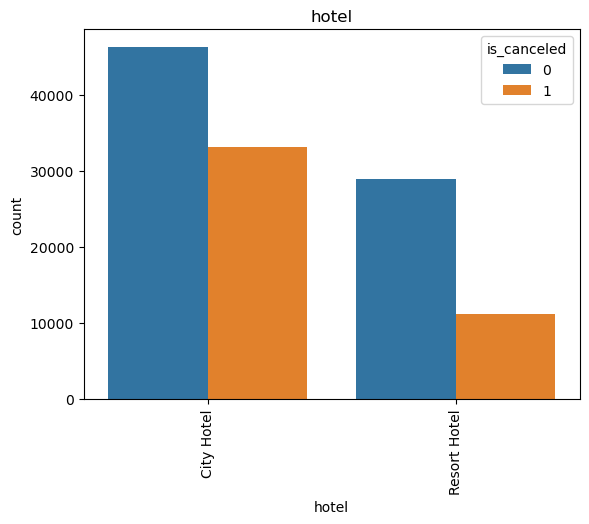

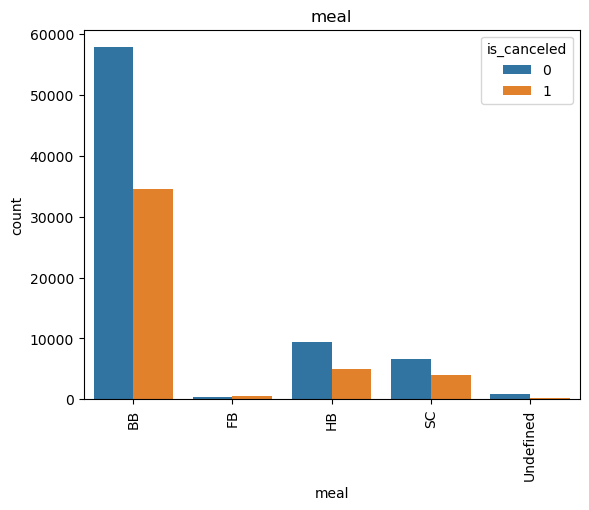

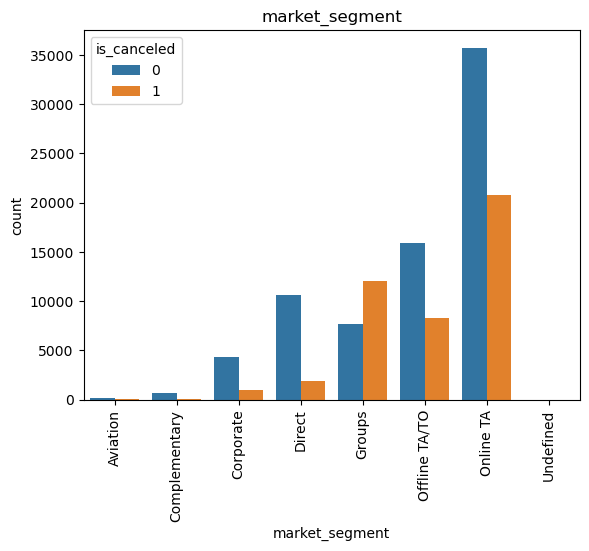

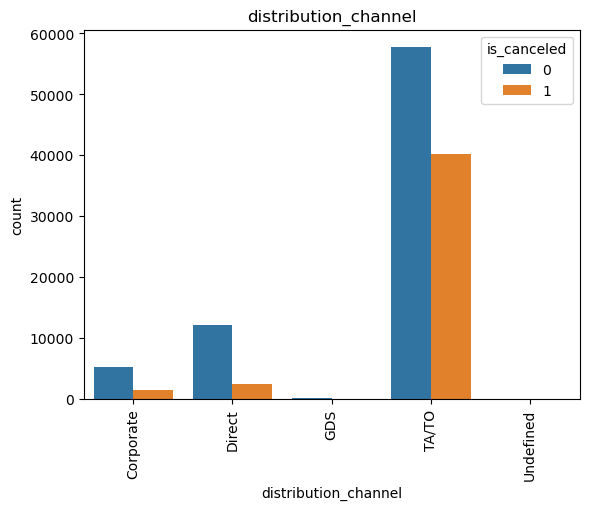

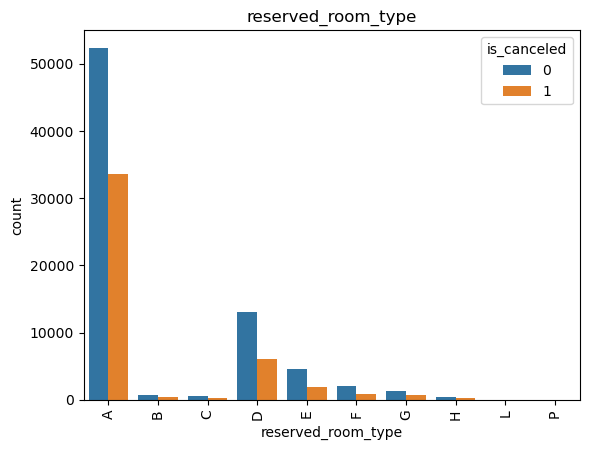

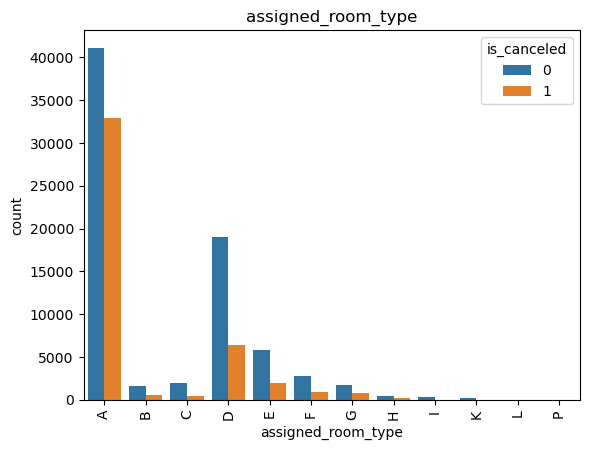

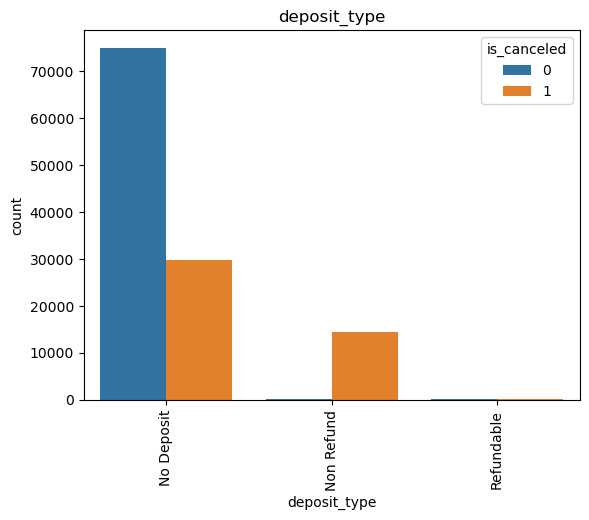

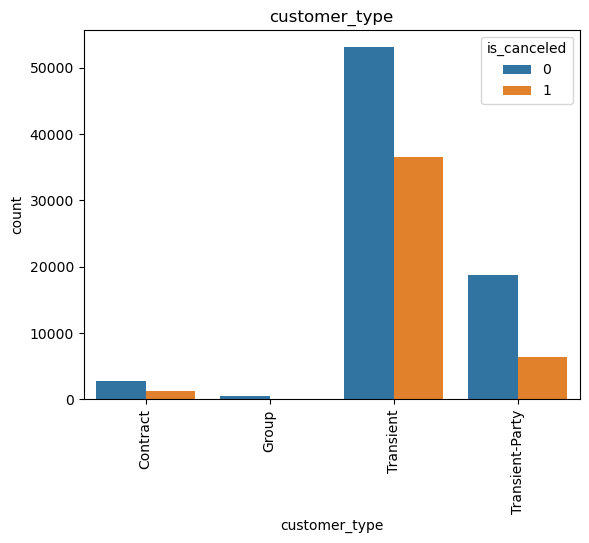

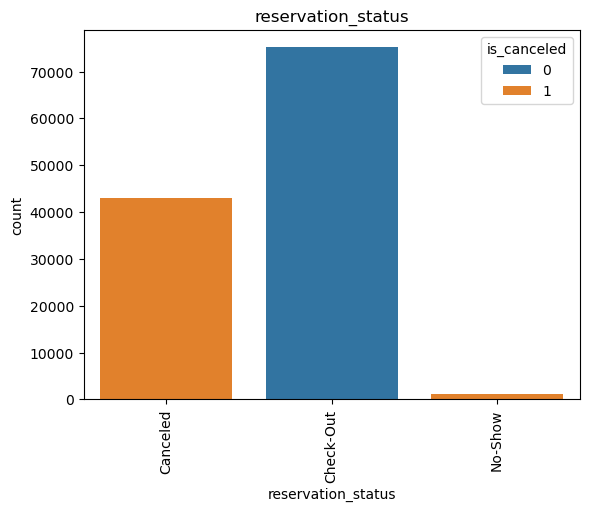

2024-12-28 23:53:57,933 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-28 23:53:58,004 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


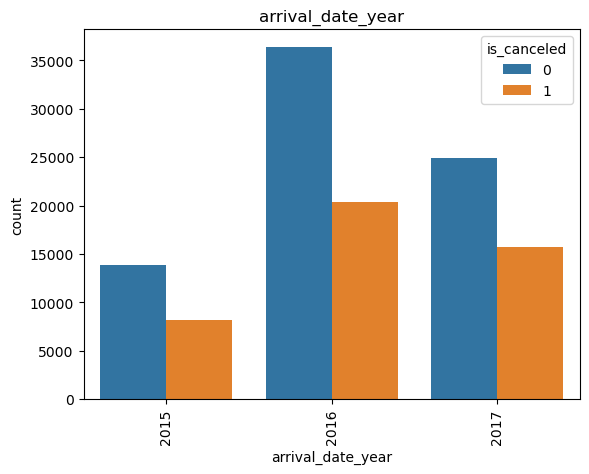

2024-12-28 23:53:58,256 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-28 23:53:58,333 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


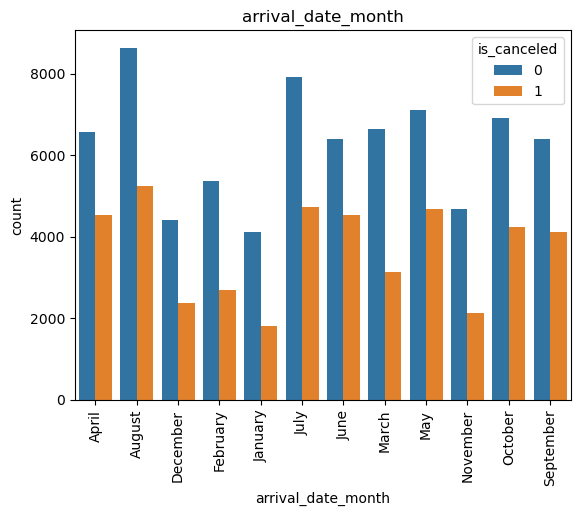

2024-12-28 23:53:58,569 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-28 23:53:58,623 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


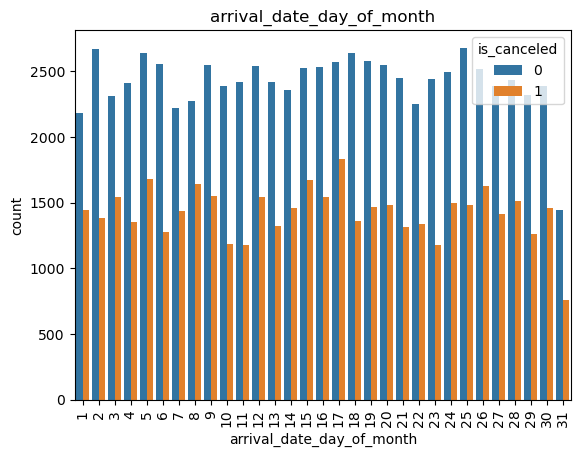

2024-12-28 23:53:58,939 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-28 23:53:59,003 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


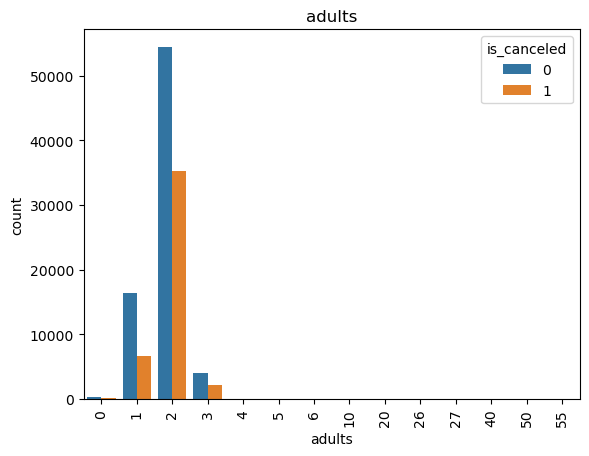

2024-12-28 23:53:59,284 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-28 23:53:59,346 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


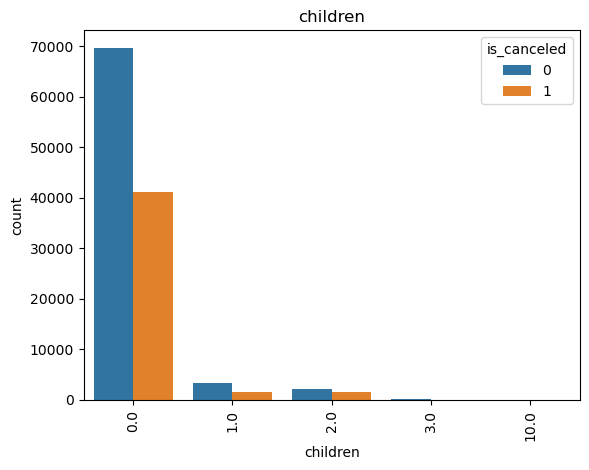

2024-12-28 23:53:59,535 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-28 23:53:59,673 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


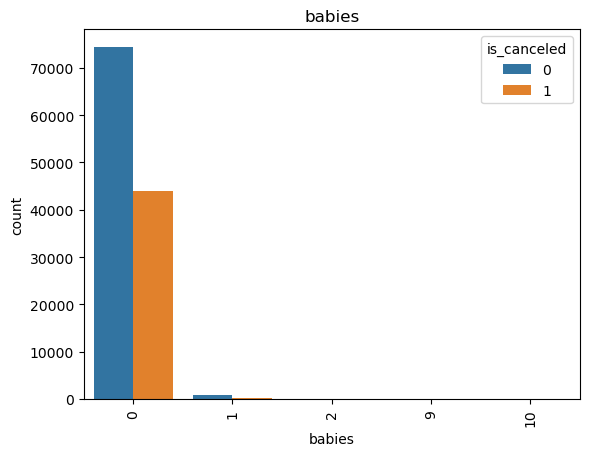

2024-12-28 23:53:59,857 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-28 23:53:59,899 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


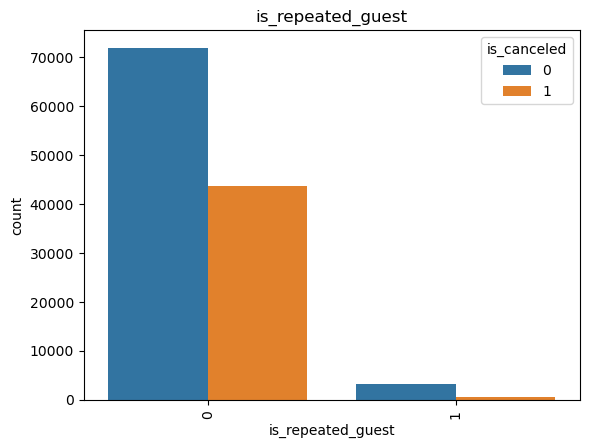

In [5]:
all_columns = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
               'reserved_room_type', 'assigned_room_type', 
               'deposit_type', 'customer_type', 'reservation_status',
               'arrival_date_year', 'arrival_date_month', 
               'arrival_date_day_of_month', 'adults', 'children', 
               'babies', 'is_repeated_guest']

for col in all_columns:
    sns.countplot(x=dane[col].astype('category'), hue=dane['is_canceled'])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()


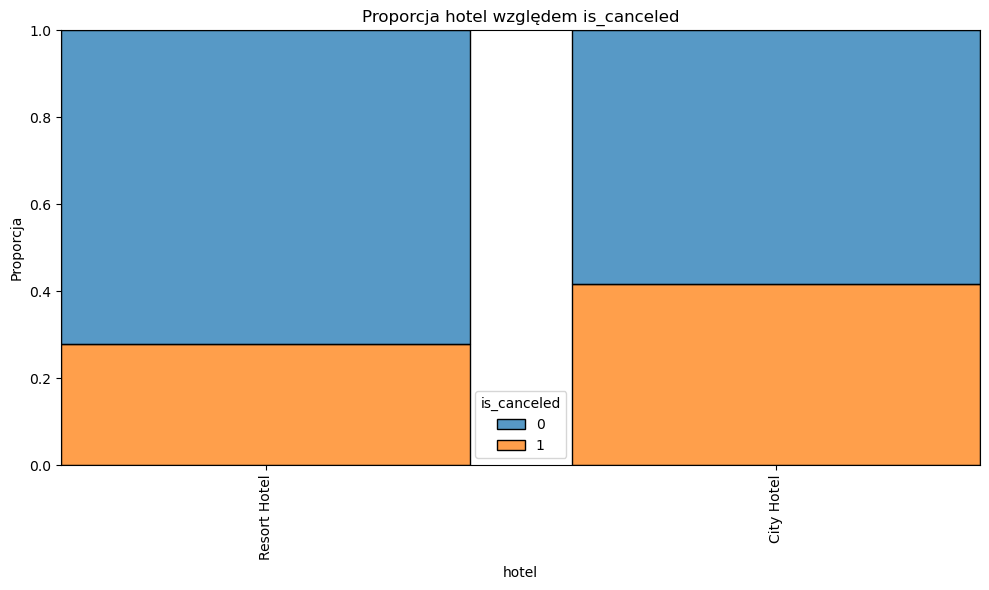

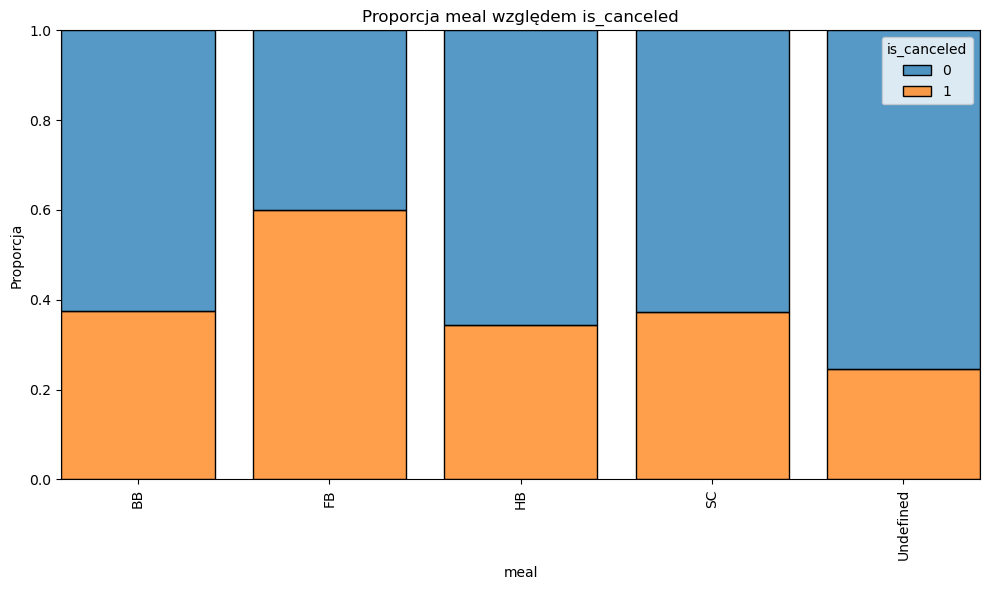

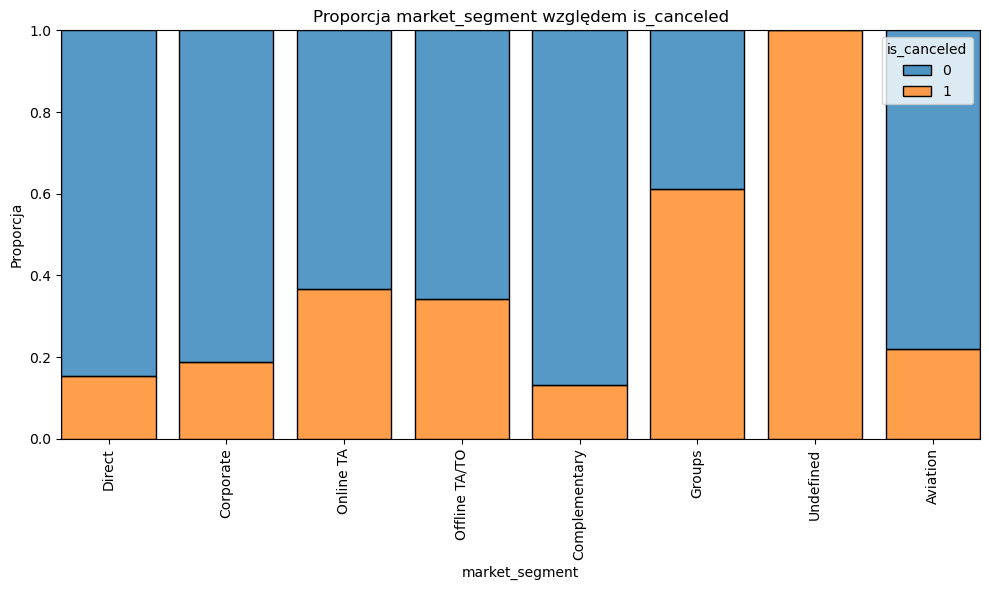

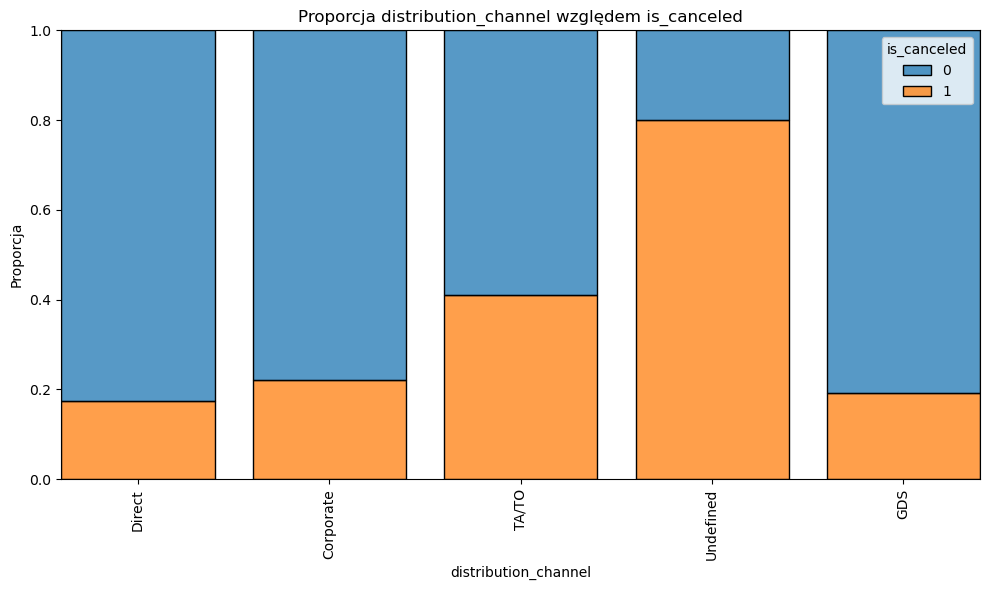

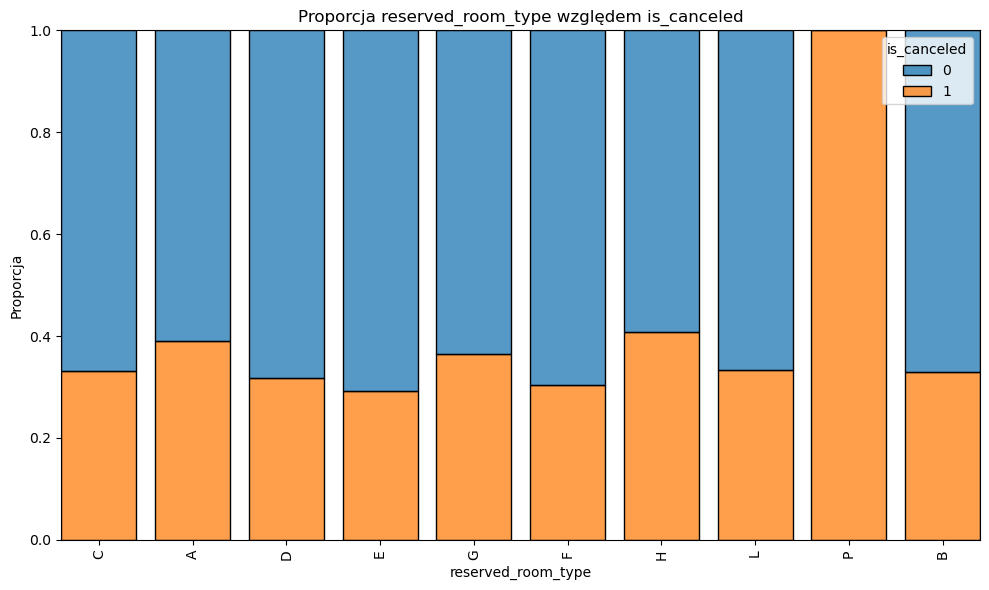

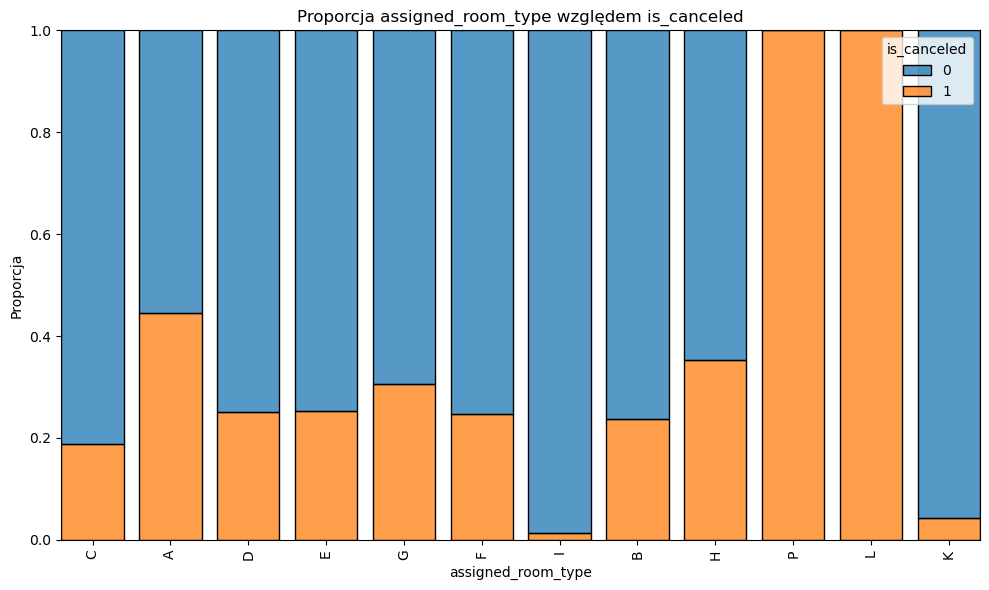

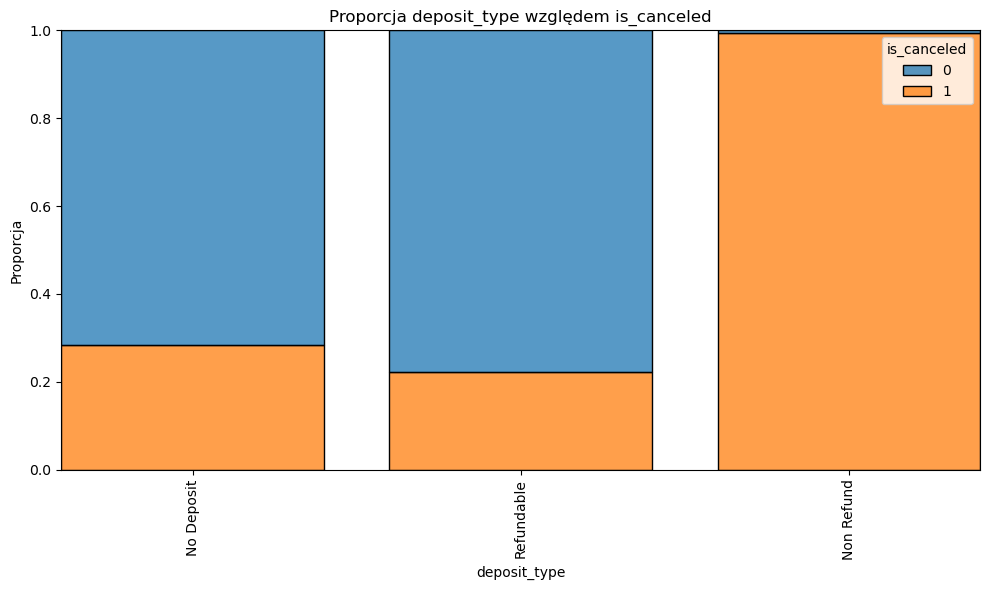

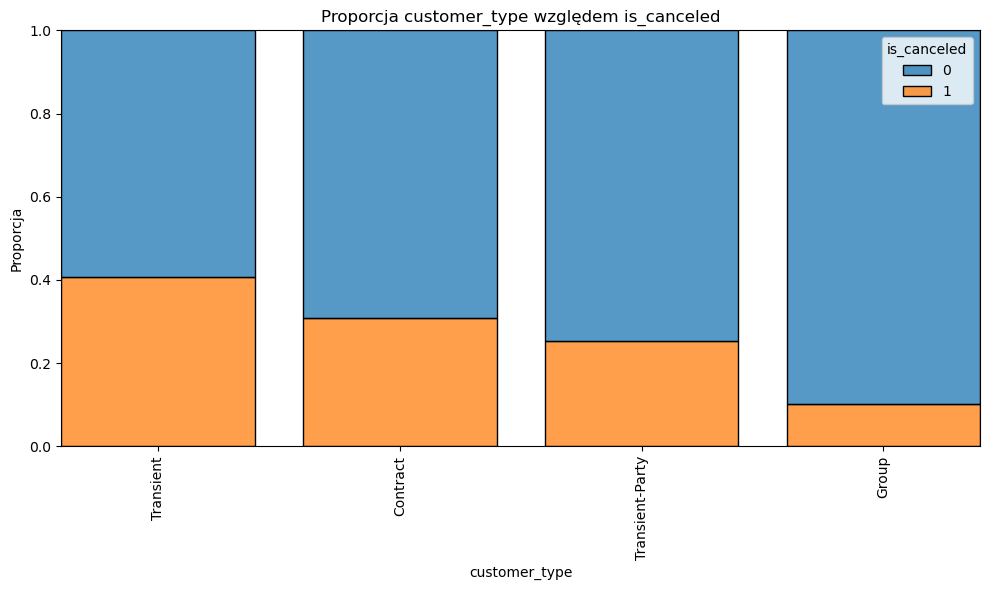

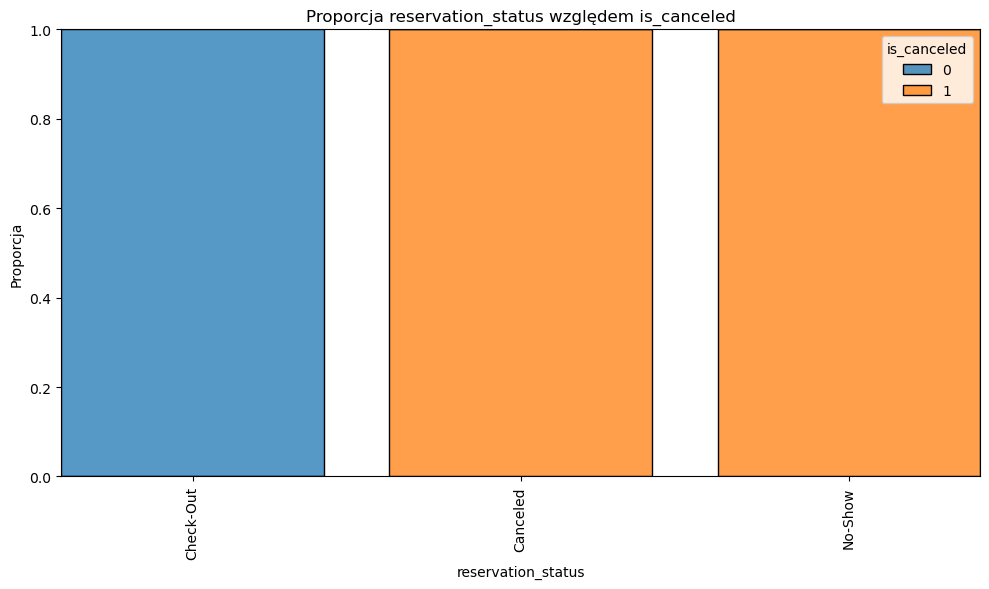

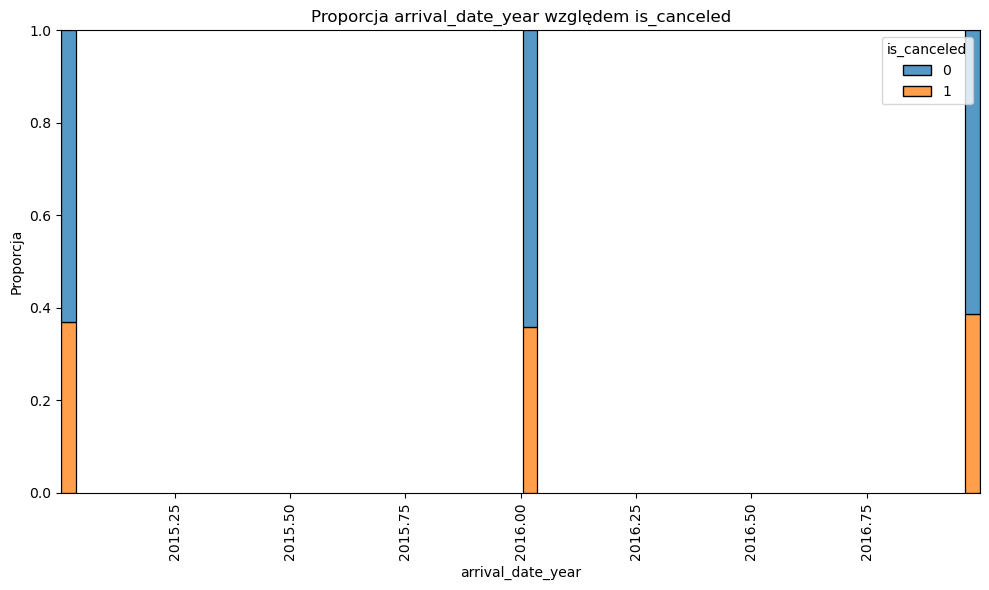

2024-12-28 23:54:20,119 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-28 23:54:20,160 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


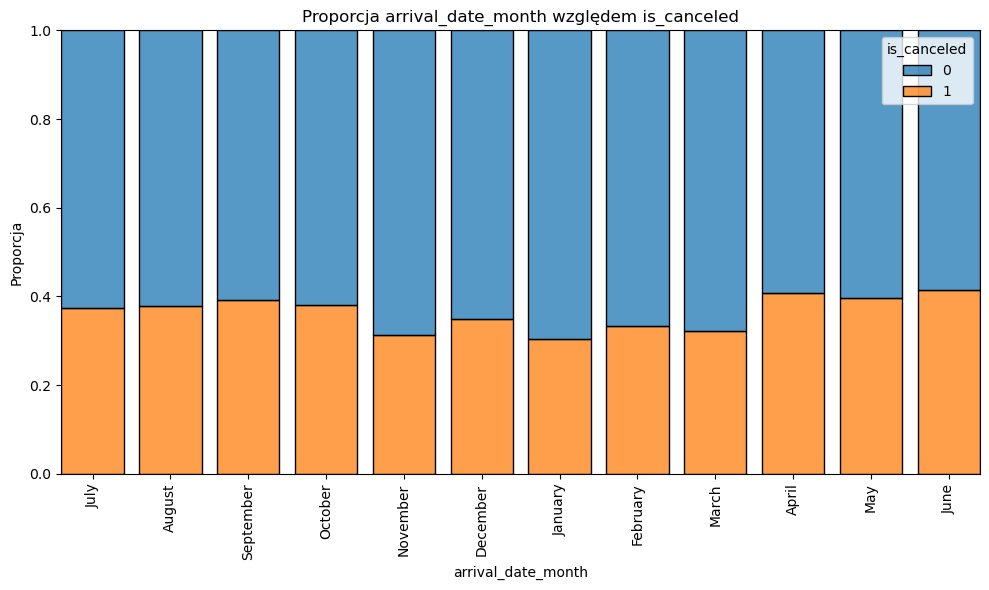

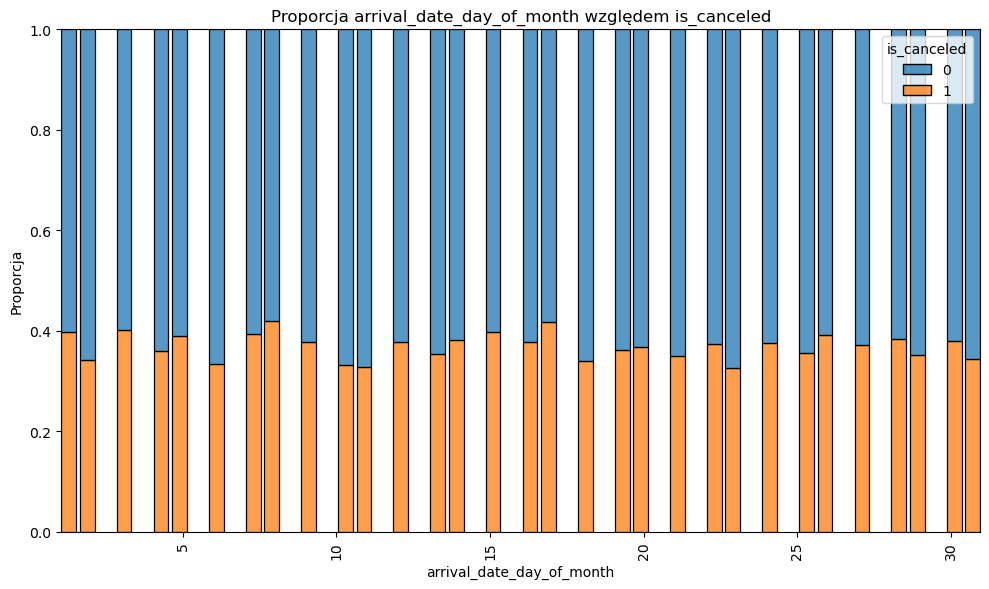

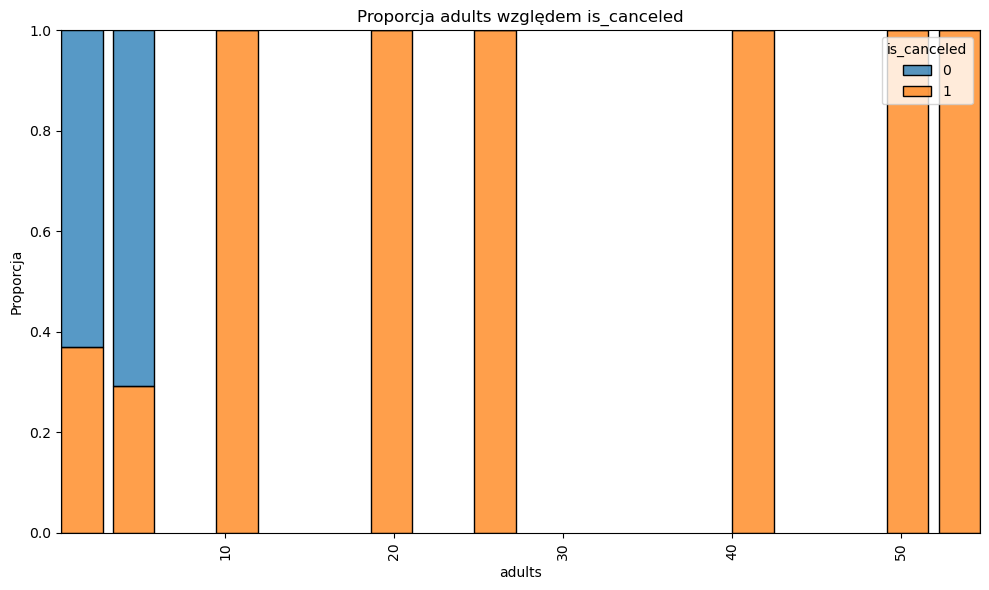

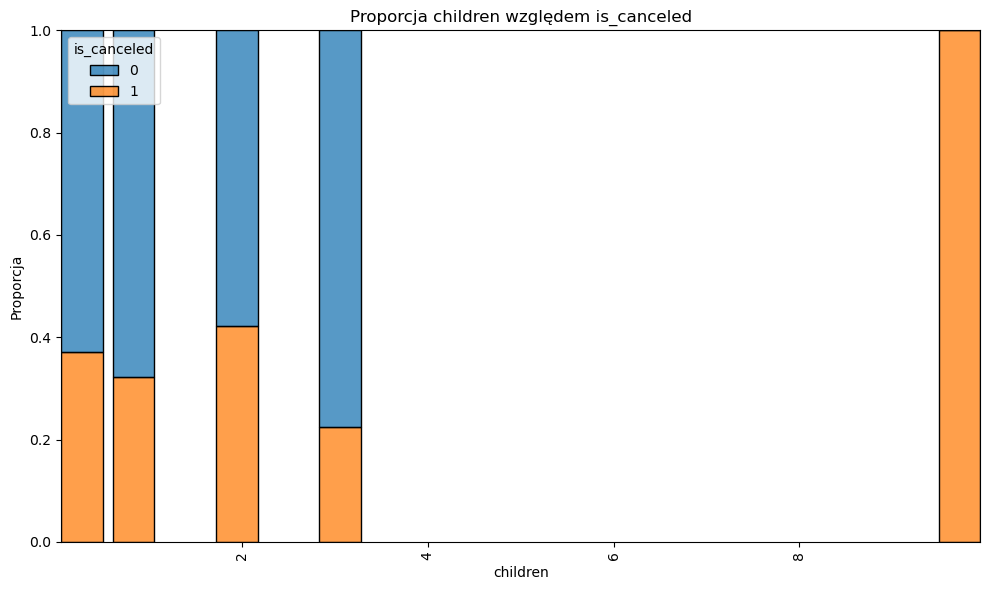

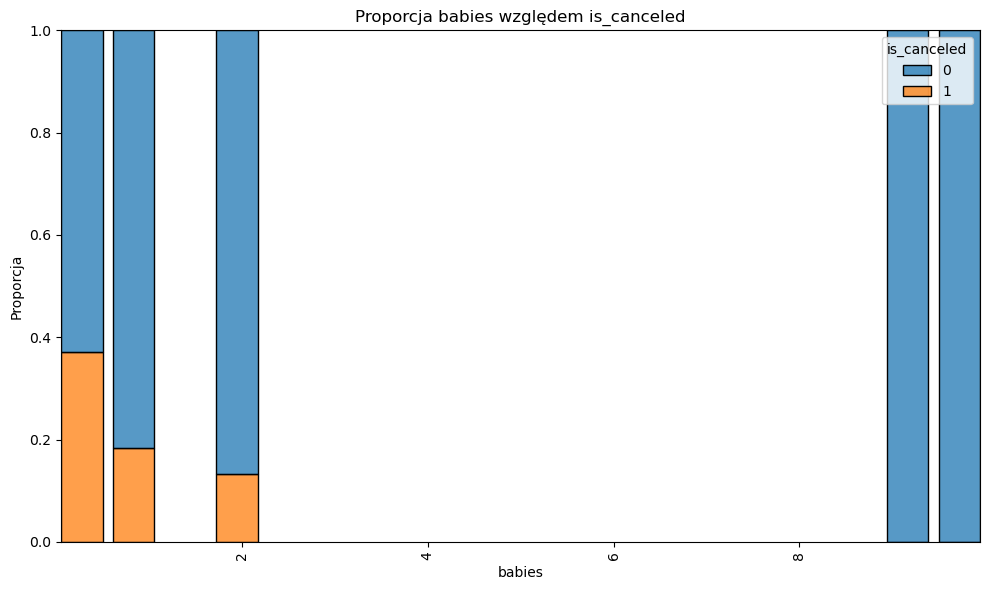

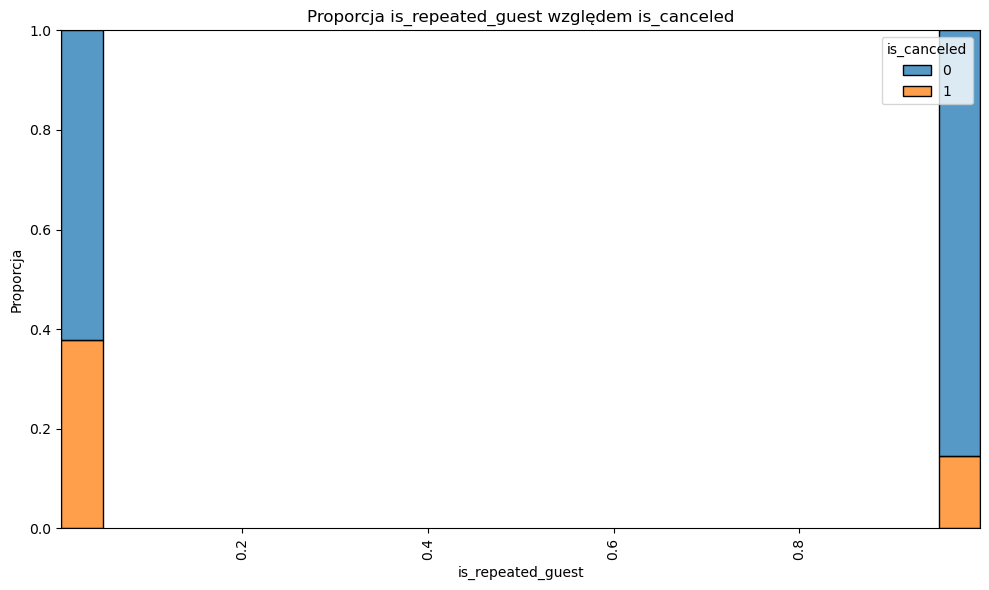

In [6]:
for col in all_columns:
    
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=dane,
        x=col,
        hue='is_canceled',
        multiple='fill',  
        stat='probability',
        shrink=0.8
    )
    plt.title(f'Proporcja {col} względem is_canceled')
    plt.xticks(rotation=90)
    plt.ylabel('Proporcja')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
